<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_1_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,61.191777,76.371465,-0.079284,216.338479,216.429946,-0.091466
1,0.0,1.0,57.329540,39.507566,24.860616,-0.247521,131.450202,131.686530,-0.236328
2,0.0,2.0,45.215694,88.427736,44.633052,-0.009402,188.267079,188.284422,-0.017342
3,0.0,3.0,69.375325,88.876246,36.273616,0.058854,204.584040,204.544740,0.039301
4,0.0,4.0,87.837297,74.451291,38.863401,0.070519,211.222508,211.174863,0.047645
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,95.270220,93.109099,67.062076,0.047650,265.489045,265.425648,0.063397
119996,999.0,116.0,70.569996,62.828016,42.130053,0.008497,185.536561,185.515286,0.021276
119997,999.0,117.0,33.053551,90.107839,55.336233,0.112791,188.610413,188.511526,0.098887
119998,999.0,118.0,97.123486,57.315162,35.571509,0.026685,200.036842,199.982435,0.054407


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.854520  61.191777  76.371465 -0.079284  216.338479   
      1.0    57.329540  39.507566  24.860616 -0.247521  131.450202   
      2.0    45.215694  88.427736  44.633052 -0.009402  188.267079   
      3.0    69.375325  88.876246  36.273616  0.058854  204.584040   
      4.0    87.837297  74.451291  38.863401  0.070519  211.222508   
...                ...        ...        ...       ...         ...   
999.0 115.0  95.270220  93.109099  67.062076  0.047650  265.489045   
      116.0  70.569996  62.828016  42.130053  0.008497  185.536561   
      117.0  33.053551  90.107839  55.336233  0.112791  188.610413   
      118.0  97.123486  57.315162  35.571509  0.026685  200.036842   
      119.0  54.147012  98.070851  99.182000 -0.113603  261.286260   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.429946 -0.091466  
      1.0    131.686530 -0.236328  
      2.0    188.284422 -0.017342  
      3.0    204.544740  0.039301  
      4.0    211.174863  0.047645  
...                 ...       ...  
999.0 115.0  265.425648  0.063397  
      116.0  185.515286  0.021276  
      117.0  188.511526  0.098887  
      118.0  199.982435  0.054407  
      119.0  261.407008 -0.120748  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.854520  61.191777  76.371465 -0.079284  216.338479   
      1.0    57.329540  39.507566  24.860616 -0.247521  131.450202   
      2.0    45.215694  88.427736  44.633052 -0.009402  188.267079   
      3.0    69.375325  88.876246  36.273616  0.058854  204.584040   
      4.0    87.837297  74.451291  38.863401  0.070519  211.222508   
...                ...        ...        ...       ...         ...   
999.0 115.0  95.270220  93.109099  67.062076  0.047650  265.489045   
      116.0  70.569996  62.828016  42.130053  0.008497  185.536561   
      117.0  33.053551  90.107839  55.336233  0.112791  188.610413   
      118.0  97.123486  57.315162  35.571509  0.026685  200.036842   
      119.0  54.147012  98.070851  99.182000 -0.113603  261.286260   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.429946 -0.091466  
      1.0    131.686530 -0.236328  
      2.0    188.284422 -0.017342  
      3.0    204.544740  0.039301  
      4.0    211.174863  0.047645  
...                 ...       ...  
999.0 115.0  265.425648  0.063397  
      116.0  185.515286  0.021276  
      117.0  188.511526  0.098887  
      118.0  199.982435  0.054407  
      119.0  261.407008 -0.120748  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,61.191777,76.371465,-0.079284,216.338479,216.429946,-0.091466
1,0.0,1.0,57.329540,39.507566,24.860616,-0.247521,131.450202,131.686530,-0.236328
2,0.0,2.0,45.215694,88.427736,44.633052,-0.009402,188.267079,188.284422,-0.017342
3,0.0,3.0,69.375325,88.876246,36.273616,0.058854,204.584040,204.544740,0.039301
4,0.0,4.0,87.837297,74.451291,38.863401,0.070519,211.222508,211.174863,0.047645
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,95.270220,93.109099,67.062076,0.047650,265.489045,265.425648,0.063397
119996,999.0,116.0,70.569996,62.828016,42.130053,0.008497,185.536561,185.515286,0.021276
119997,999.0,117.0,33.053551,90.107839,55.336233,0.112791,188.610413,188.511526,0.098887
119998,999.0,118.0,97.123486,57.315162,35.571509,0.026685,200.036842,199.982435,0.054407


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.854520  61.191777  76.371465 -0.079284  216.338479   
      1.0    57.329540  39.507566  24.860616 -0.247521  131.450202   
      2.0    45.215694  88.427736  44.633052 -0.009402  188.267079   
      3.0    69.375325  88.876246  36.273616  0.058854  204.584040   
      4.0    87.837297  74.451291  38.863401  0.070519  211.222508   
...                ...        ...        ...       ...         ...   
999.0 115.0  95.270220  93.109099  67.062076  0.047650  265.489045   
      116.0  70.569996  62.828016  42.130053  0.008497  185.536561   
      117.0  33.053551  90.107839  55.336233  0.112791  188.610413   
      118.0  97.123486  57.315162  35.571509  0.026685  200.036842   
      119.0  54.147012  98.070851  99.182000 -0.113603  261.286260   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.429946 -0.091466  
      1.0    131.686530 -0.236328  
      2.0    188.284422 -0.017342  
      3.0    204.544740  0.039301  
      4.0    211.174863  0.047645  
...                 ...       ...  
999.0 115.0  265.425648  0.063397  
      116.0  185.515286  0.021276  
      117.0  188.511526  0.098887  
      118.0  199.982435  0.054407  
      119.0  261.407008 -0.120748  

[120000 rows x 7 columns]

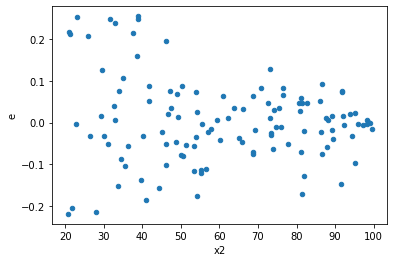

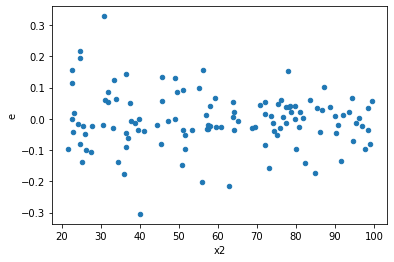

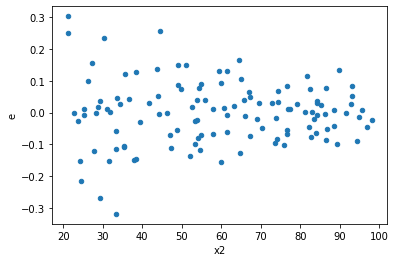

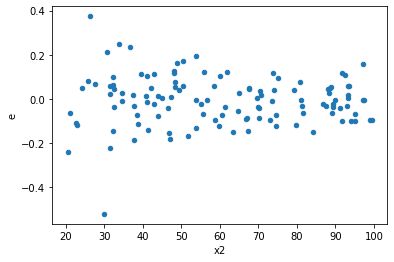

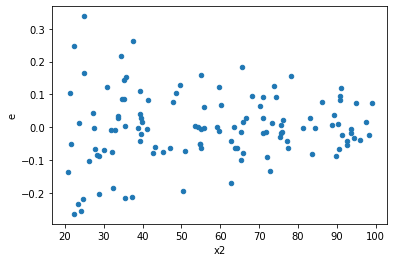

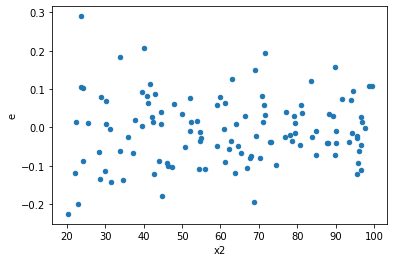

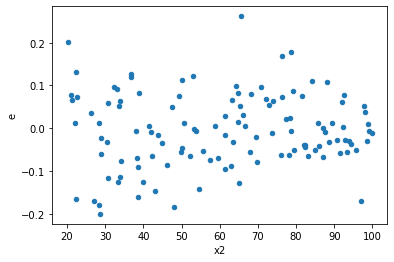

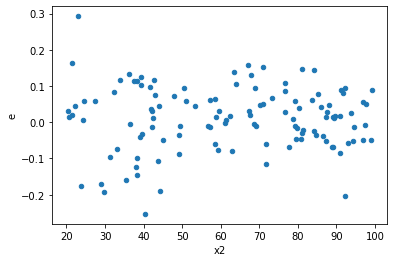

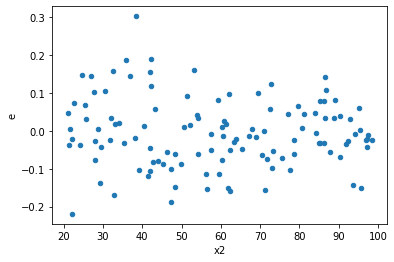

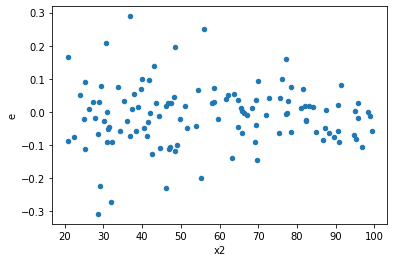

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,58.0,56.0,0.4466739563399986,0.5720357148266871,0.007701275109310321,0.010214923479047984,1.3263937898671914,0.2903852248172396,0.8548073875913802,0.1451926124086198,Reject005=1 : Homoscedasticity
1.0,59.0,55.0,0.45429696862283014,0.5329284212858498,0.007699948620725935,0.009689607659742723,1.258399001996095,0.39083992744797413,0.8045800362760129,0.19541996372398707,Reject005=1 : Homoscedasticity
2.0,58.0,56.0,0.482104055657634,0.6025066720406169,0.008312138890648862,0.010759047715011016,1.2943777596299457,0.33403568308445086,0.8329821584577746,0.16701784154222543,Reject005=1 : Homoscedasticity
3.0,62.0,52.0,0.5000857911645069,0.4436664786486219,0.008065899857492047,0.008532047666319651,1.057792412137949,0.8396327526976373,0.5801836236511814,0.41981637634881863,Reject005=1 : Homoscedasticity
5.0,51.0,63.0,0.2994355821094635,0.7503069221149431,0.005871285923714971,0.011909633684364176,2.028454045519985,0.007854443935653821,0.9960727780321731,0.0039272219678269105,Reject005=0 : Heteroscedasticity
6.0,60.0,54.0,0.5421555794658669,0.6810223587172992,0.009035926324431115,0.012611525161431467,1.3957091623614433,0.21490866679502085,0.8925456666024896,0.10745433339751043,Reject005=1 : Homoscedasticity
7.0,67.0,47.0,0.3715095215442392,0.5179338202308584,0.00554491823200357,0.01101986851555018,1.987381608613608,0.014142080691648573,0.9929289596541757,0.0070710403458242865,Reject005=0 : Heteroscedasticity
11.0,54.0,60.0,0.2739917337997602,0.642869536579852,0.005073920996291856,0.010714492276330867,2.111678972566044,0.005168242484955732,0.9974158787575221,0.002584121242477866,Reject005=0 : Heteroscedasticity
12.0,58.0,56.0,0.552381853307546,0.620249326358578,0.009523825057026654,0.011075880827831749,1.1629655901396458,0.5718973527481537,0.7140513236259232,0.28594867637407684,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,58.0,56.0,0.4466739563399986,0.5720357148266871,0.007701275109310321,0.010214923479047984,1.3263937898671914,0.2903852248172396,Reject005=1 : Homoscedasticity
1.0,59.0,55.0,0.45429696862283014,0.5329284212858498,0.007699948620725935,0.009689607659742723,1.258399001996095,0.39083992744797413,Reject005=1 : Homoscedasticity
2.0,58.0,56.0,0.482104055657634,0.6025066720406169,0.008312138890648862,0.010759047715011016,1.2943777596299457,0.33403568308445086,Reject005=1 : Homoscedasticity
3.0,62.0,52.0,0.5000857911645069,0.4436664786486219,0.008065899857492047,0.008532047666319651,1.057792412137949,0.8396327526976373,Reject005=1 : Homoscedasticity
4.0,44.0,70.0,0.4515350181409677,0.6091724455097615,0.010262159503203812,0.008702463507282307,0.8480148359188363,0.5629926065345133,Reject005=1 : Homoscedasticity
5.0,51.0,63.0,0.2994355821094635,0.7503069221149431,0.005871285923714971,0.011909633684364176,2.028454045519985,0.007854443935653821,Reject005=0 : Heteroscedasticity
6.0,60.0,54.0,0.5421555794658669,0.6810223587172992,0.009035926324431115,0.012611525161431467,1.3957091623614433,0.21490866679502085,Reject005=1 : Homoscedasticity
7.0,67.0,47.0,0.3715095215442392,0.5179338202308584,0.00554491823200357,0.01101986851555018,1.987381608613608,0.014142080691648573,Reject005=0 : Heteroscedasticity
8.0,57.0,57.0,0.6412414205811146,0.3012300439514834,0.011249849483879203,0.005284737613183919,0.46976073953316766,0.005000410971816441,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      587
Reject005=0 : Heteroscedasticity    413
Name: Result_test, dtype: int64